# Sentiment analysis of Product reviews using TensorFlow

## Intro:
We all would have used Amazon in our day-to-day life, be it buying groceries, books, spare parts... It can be anything! But have you ever thought how Amazon shows you products, that too only filtered (if you apply them) based on ratings and reviews? Well, there comes sentiment analysis! 

## Definition:
Sentiment analysis (or opinion mining) is a natural language processing (NLP) technique used to determine whether data is positive, negative or neutral. Sentiment analysis is often performed on textual data to help businesses monitor brand and product sentiment in customer feedback, and understand customer needs. Many companies use this technique to improve their products and business.


### Instructions for running this notebook:
If you want to run this notebook, make sure you have GPU for running this program, if no, then you can run this in Kaggle (best because any dataset can be imported directly throught there!) or Google Colab

**Prerequisities needed**:
 - A good dataset (a large review dataset)
 - GPU (TPU is also preferred)
 - Tensorflow Text and Tensorflow Hub (need to install for obtaining the text encoder)

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed. This notebook is run on Kaggle
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/hotel-reviews/7282_1.csv
/kaggle/input/hotel-reviews/Datafiniti_Hotel_Reviews.csv
/kaggle/input/hotel-reviews/Datafiniti_Hotel_Reviews_Jun19.csv
/kaggle/input/consumer-reviews-of-amazon-products/Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products.csv
/kaggle/input/consumer-reviews-of-amazon-products/1429_1.csv
/kaggle/input/consumer-reviews-of-amazon-products/Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products_May19.csv


In [2]:
# Library import part

import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import OneHotEncoder

In [3]:
# Installing some libraries as they aren't present in Kaggle or Colab
!pip install -q tensorflow-text
import tensorflow_text as text
import tensorflow_hub as hub

# Below the code, it's a Universal Sentence Encoder where any text can be converted into tensors easily
USE = hub.load("https://tfhub.dev/google/universal-sentence-encoder-multilingual-large/3")

In [4]:
# Example: How the sentences are equivalent

sent_1 = ["the location is great"]
sent_2 = ["amazing location"]

emb1 = USE(sent_1)
emb2 = USE(sent_2)

print(emb1.shape)
print(np.inner(emb1, emb2).flatten()[0])
# The value will print some equivalent one close to 0.80 to 1

(1, 512)
0.7925469


In [5]:
# Dataset part
dataset = pd.read_csv("../input/consumer-reviews-of-amazon-products/Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products_May19.csv")

dataset.head()
# Prints 1st 5 rows

,id,dateAdded,dateUpdated,name,asins,brand,categories,primaryCategories,imageURLs,keys,...,reviews.didPurchase,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.username,sourceURLs
0,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,3,https://www.amazon.com/product-reviews/B00QWO9...,I order 3 of them and one of the item is bad q...,... 3 of them and one of the item is bad quali...,Byger yang,"https://www.barcodable.com/upc/841710106442,ht..."
1,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,4,https://www.amazon.com/product-reviews/B00QWO9...,Bulk is always the less expensive way to go fo...,... always the less expensive way to go for pr...,ByMG,"https://www.barcodable.com/upc/841710106442,ht..."
2,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,Well they are not Duracell but for the price i...,... are not Duracell but for the price i am ha...,BySharon Lambert,"https://www.barcodable.com/upc/841710106442,ht..."
3,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,Seem to work as well as name brand batteries a...,... as well as name brand batteries at a much ...,Bymark sexson,"https://www.barcodable.com/upc/841710106442,ht..."
4,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,These batteries are very long lasting the pric...,... batteries are very long lasting the price ...,Bylinda,"https://www.barcodable.com/upc/841710106442,ht..."


In [6]:
# Now, creating two columns for easy view!

dataset["review"] = dataset["reviews.text"]

dataset["score"] = dataset["reviews.rating"].apply(lambda x: "negative" if x<3 else "positive")

# Creating a seperate new variable

df = dataset[["review", "score"]]

In [7]:
# Testing the reviews....
df.head()

# Saving in seperate CSV file, but it's not important
df.to_csv("results.csv")

In [8]:
# Viewing values based on segregation we done
df.score.value_counts()

positive    26751
negative     1581
Name: score, dtype: int64

In [9]:
# Now, seperating values into two diff values
positive_df = df[df["score"] == "positive"]
negative_df = df[df["score"] == "negative"]

print(positive_df.shape, negative_df.shape)

(26751, 2) (1581, 2)


Now, as the data is somewhat unequal, that is, good reviews are more in number than bad ones
So, we're making them in equal to avoid problems!

In [10]:
good_df = positive_df.sample(n=len(negative_df), random_state=42)
bad_df = negative_df

# This is done to make both data equal in number

In [11]:
review_df = good_df.append(bad_df).reset_index(drop=True)
review_df.shape

(3162, 2)

In [12]:
review_df.head()

,review,score
0,good batteriess,positive
1,These are great batteries and I only buy them ...,positive
2,"great price, lasts a long time too",positive
3,"My Son absolutely loves this thing, very durab...",positive
4,This was on my wife's Christmas list. She love...,positive


After doing that, now we can encode the data and start splitting the dataset

In [13]:
from sklearn.preprocessing import OneHotEncoder

type_one_hot = OneHotEncoder(sparse=False).fit_transform(
  review_df.score.to_numpy().reshape(-1, 1)
)

In [14]:
from sklearn.model_selection import train_test_split

train_reviews, test_reviews, y_train, y_test =\
  train_test_split(
    review_df.review, 
    type_one_hot, 
    test_size=.1, 
    random_state=42
  )

In [15]:
from tqdm import tqdm

X_train = []
for r in tqdm(train_reviews):
  emb = USE(r)
  review_emb = tf.reshape(emb, [-1]).numpy()
  X_train.append(review_emb)

X_train = np.array(X_train)

X_test = []
for r in tqdm(test_reviews):
  emb = USE(r)
  review_emb = tf.reshape(emb, [-1]).numpy()
  X_test.append(review_emb)

X_test = np.array(X_test)

100%|██████████| 317/317 [00:18<00:00, 16.93it/s]


Here comes the model!

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               131328    
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               32896     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 1

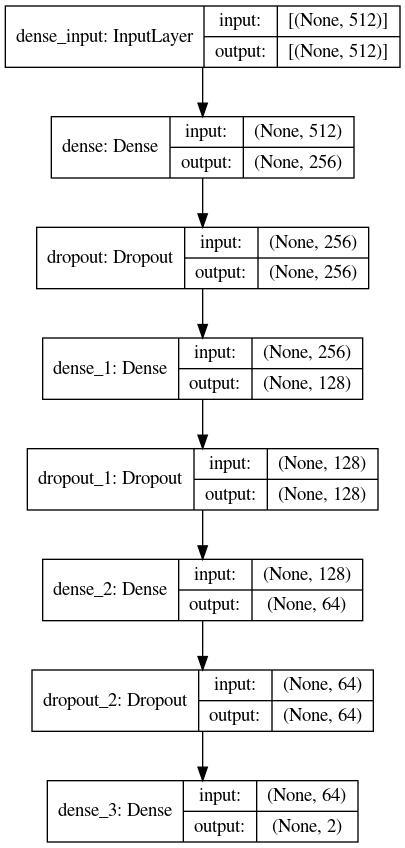

In [16]:
from keras.utils.vis_utils import plot_model
from keras.layers import LSTM, SpatialDropout1D

model = keras.Sequential()

model.add(
  keras.layers.Dense(
    units=256,
    input_shape=(X_train.shape[1], ),
    activation='relu'
  )
)
model.add(
  keras.layers.Dropout(rate=0.5)
)

model.add(
  keras.layers.Dense(
    units=128,
    activation='relu'
  )
)
model.add(
  keras.layers.Dropout(rate=0.5)
)

model.add(
  keras.layers.Dense(
    units=64,
    activation='relu',
    kernel_regularizer='l1' # This one worked so yes
  )
)

model.add(
  keras.layers.Dropout(rate=0.3)
)

model.add(keras.layers.Dense(2, activation='softmax'))
model.compile(
    loss='categorical_crossentropy', 
    optimizer=keras.optimizers.Adam(0.001),
    metrics=['accuracy']
)


print(model.summary())
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [17]:
history = model.fit(
    X_train, y_train, 
    epochs=22, 
    batch_size=16, 
    validation_split=0.1, 
    verbose=1, 
    shuffle=True
)

Epoch 1/22
160/160 [==============================] - 2s 7ms/step - loss: 5.2559 - accuracy: 0.7095 - val_loss: 0.5452 - val_accuracy: 0.9228
Epoch 2/22
160/160 [==============================] - 1s 3ms/step - loss: 0.4981 - accuracy: 0.8863 - val_loss: 0.3313 - val_accuracy: 0.9333
Epoch 3/22
160/160 [==============================] - 0s 3ms/step - loss: 0.3829 - accuracy: 0.9075 - val_loss: 0.2907 - val_accuracy: 0.9368
Epoch 4/22
160/160 [==============================] - 0s 3ms/step - loss: 0.3373 - accuracy: 0.9250 - val_loss: 0.2733 - val_accuracy: 0.9333
Epoch 5/22
160/160 [==============================] - 1s 3ms/step - loss: 0.3236 - accuracy: 0.9118 - val_loss: 0.2763 - val_accuracy: 0.9368
Epoch 6/22
160/160 [==============================] - 0s 3ms/step - loss: 0.2908 - accuracy: 0.9376 - val_loss: 0.2664 - val_accuracy: 0.9228
Epoch 7/22
160/160 [==============================] - 1s 3ms/step - loss: 0.2806 - accuracy: 0.9378 - val_loss: 0.2545 - val_accuracy: 0.9228
Epoch 

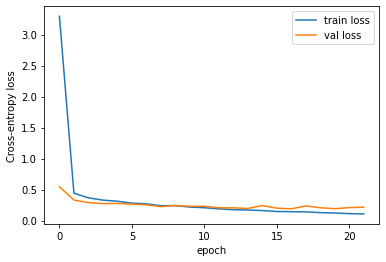

In [18]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.xlabel("epoch")
plt.ylabel("Cross-entropy loss")
plt.legend();

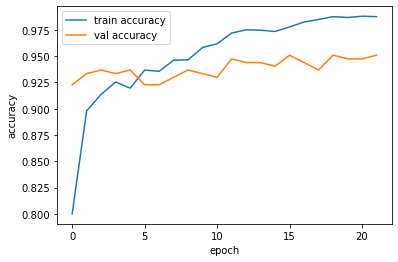

In [19]:
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.legend();

In [20]:
model.evaluate(X_test, y_test)

10/10 [==============================] - 0s 2ms/step - loss: 0.3811 - accuracy: 0.9085


[0.3810981810092926, 0.9085173606872559]

In [21]:
# Now, let's test the model with 3 examples
print(test_reviews.iloc[0])
print("Bad" if y_test[0][0] == 1 else "Good")

Love the HD8 the extra inch makes a huge difference over the HD7.
Good


In [22]:
y_pred = model.predict(X_test[:1])
print(y_pred)
"Bad" if np.argmax(y_pred) == 0 else "Good"

[[6.600287e-04 9.993400e-01]]


'Good'

In [23]:
print(test_reviews.iloc[10])
print("Bad" if y_test[1][0] == 1 else "Good")

This fire is much better than the old one so far. It responds much faster and has a much better screen. I also put a 128 gig memory stick into it which the old fire could not accommodate. So far, so good.
Good


As the model now works correctly, it's time to export it!
Here, we'll be exporting the model using TF Lite/HDF5

In [24]:
# Saving the model in H5 type
# Type from here!
model.save("Analysis.h5")

The above model can be exported to use directly on Webpage (with help of Flask library in Python)